In [ ]:
#data preperation

In [2]:
# Import the necessary libraries
# data transformation
import pandas as pd
import numpy as np
from functools import reduce

# plotting
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use("ggplot")
from matplotlib import rc
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
from matplotlib import gridspec
from pylab import *
import matplotlib.patches as mpatches
import seaborn as sns


# classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

#for generating date_time 
import time
import datetime

In [56]:
#reading the data
# The data set contains a variety of data types.  It is best to specify them before importing.
# KEY: proper name
# VALUE: pandas dtype
datatypes = {
    "Borough": "category",
    "Map Atlas": "category",
    "Block": "category",
    "Lot": "category",
    "Address": "str",
    "Parcel Name": "str",
    "Agency": "category",
    "Current Uses": "str",
    "Total Area": "int",
    "Open Petroleum Spill": "category",
    "Govt Clean-Up Program": "category",
    "Structure Completed": "category",
    "Number Structures": "int",
    "Total Gross Area Structures": "int",
    "Ratio Building to Floor Area": "float",
    "Allowable Building to Floor Area": "float",
    "Land Use Category": "category",
    "Community Board": "category",
    "Census Tract": "category",
    "Census Block": "category",
    "School Dist": "category",
    "Council District": "category",
    "Postcode": "category",
    "Fire Comp": "category",
    "Health Area": "category",
    "Health Ctr": "category",
    "Police Prct": "category",
    "Major Use": "category",
    "Number of Easements": "int",
    "Commercial Floor Area": "int",
    "Residential Floor Area": "int",
    "Office Floor Area": "int",
    "Retail Floor Area": "int",
    "Garage Floor Area": "int",
    "Storage Floor Area": "int",
    "Factory Floor Area": "int",
    "Other Floor Area": "int",
    "Num Floors": "float",
    "Residential Units": "int",
    "Residential and Non-Residential Units": "int",
    "Lot Front": "float",
    "Lot Depth": "float",
    "Bldg Front": "float",
    "Bldg Depth": "float",
    "Proximity Code": "category",
    "Irr Lot Code": "category",
    "Lot Type Code": "category",
    "Bsmt Code": "category",
    "Assess Land": "float",
    "Exempt Land": "float",
    "Exempt Tot": "float",
    "Year Alter 1": "category",
    "Year Alter 2": "category",
    "His Dist": "category",
    "Landmark": "str",
    "Condominium Number": "category",
    "Coordinates": "str",
    "E-Designation Number": "category",
    "Industrial Business Zone": "category",
    "Zone Dist": "category",
    "Zone Dist 2": "category",
    "Overlay 1": "category",
    "Overlay 2": "category",
    "SP Dist 1": "category",
    "SP Dist 2": "category",
    "Potential Urban Ag": "category",
    "Contact": "str",
    "EDC % Occupied": "float",
    "Pluto Version": "category",
    "Latitude": "float",
    "Longitude": "float",
    "BIN": "str",
    "NTA": "category"
}

# Similarly, each column will have to have a different method of handling missing values.
# KEY: proper name
# VALUE: missing value type
nan = np.nan
nas = {
    "Borough": "",
    "Map Atlas": "",
    "Block": nan,
    "Lot": nan,
    "Address": "",
    "Parcel Name": "",
    "Agency": "",
    "Current Uses": "",
    "Total Area": nan,
    "Open Petroleum Spill": "",
    "Govt Clean-Up Program": "",
    "Structure Completed": nan,
    "Number Structures": nan,
    "Total Gross Area Structures": nan,
    "Ratio Building to Floor Area": nan,
    "Allowable Building to Floor Area": nan,
    "Land Use Category": "",
    "Community Board": "",
    "Census Tract": nan,
    "Census Block": "",
    "School Dist": "",
    "Council District": "",
    "Postcode": "",
    "Fire Comp": "",
    "Health Area": "",
    "Health Ctr": "",
    "Police Prct": "",
    "Major Use": "",
    "Number of Easements": nan,
    "Commercial Floor Area": nan,
    "Residential Floor Area": nan,
    "Office Floor Area": nan,
    "Retail Floor Area": nan,
    "Garage Floor Area": nan,
    "Storage Floor Area": nan,
    "Factory Floor Area": nan,
    "Other Floor Area": nan,
    "Num Floors": nan,
    "Residential Units": nan,
    "Residential and Non-Residential Units": nan,
    "Lot Front": nan,
    "Lot Depth": nan,
    "Bldg Front": nan,
    "Bldg Depth": nan,
    "Proximity Code": "",
    "Irr Lot Code": "",
    "Lot Type Code": "",
    "Bsmt Code": "",
    "Assess Land": nan,
    "Exempt Land": nan,
    "Exempt Tot": nan,
    "Year Alter 1": nan,
    "Year Alter 2": nan,
    "His Dist": "",
    "Landmark": "",
    "Condominium Number": nan,
    "Coordinates": "",
    "E-Designation Number": "",
    "Industrial Business Zone": "",
    "Zone Dist": "",
    "Zone Dist 2": "",
    "Overlay 1": "",
    "Overlay 2": "",
    "SP Dist 1": "",
    "SP Dist 2": "",
    "Potential Urban Ag": "",
    "Contact": "",
    "EDC % Occupied": nan,
    "Pluto Version": "",
    "Latitude": nan,
    "Longitude": nan,
    "BIN": "",
    "NTA": ""
}
# Read in the data.
nyc = pd.read_csv(
    "./city-owned-and-leased-property-local-law-48-of-2011.csv",
    dtype=datatypes,
    na_values=nas)



In [57]:
# did not add in pd.read_csv because column name takes array, while dictionary is easier to read and comprehend. pandas is a little funky this way

# create proper names to label graphs
proper_names = list(nyc)

#replace space with underscore
nyc.columns = nyc.columns.str.replace(' ', '_')

#make lowercase
nyc.columns = nyc.columns.str.lower()

#create proper name dictionary for plotting
proper_name_dict = dict(zip(list(nyc.columns), proper_names)) 

In [58]:
# Preview the data
nyc.head(10)

,date_created,borough,map_atlas,block,lot,address,parcel_name,agency,current_uses,total_area,...,sp_dist_1,sp_dist_2,potential_urban_ag,contact,edc_%_occupied,pluto_version,latitude,longitude,bin,nta
0,2013-12-11T00:00:00,1,4,2,1,MARGINAL STREET,BATTERY MARITIME BLDG / FERRY,"DOT, DSBS","FERRY TERMINAL, WATERFRONT PROPERTY, NO USE",209215,...,LM,NaN,NaN,Christian Grove cgrove@dcas.nyc.gov 212 386-0613,0.0,13v1,NaN,NaN,NaN,NaN
1,2013-12-11T00:00:00,1,4,2,23,PIER 6,PIER 6,DSBS,"NO USE, FINAL COMMITMNT-DISP, IN USE-TENANTED,...",510025,...,LM,NaN,NaN,Christian Grove cgrove@dcas.nyc.gov 212 386-0613,0.0,13v1,40.701481,-74.009171,1075697,Battery Park City-Lower Manhattan
2,2013-12-11T00:00:00,1,4,3,1,BATTERY PARK,BATTERY PARK,PARKS,PARK,945425,...,NaN,NaN,NaN,Christian Grove cgrove@dcas.nyc.gov 212 386-0613,0.0,13v1,40.702880,-74.015523,1000000,park-cemetery-etc-Manhattan
3,2013-12-11T00:00:00,1,4,3,2,PETER MINUIT PLAZA,PETER MINUIT PLAZA/BATTERY PK,PARKS,PARK,39900,...,NaN,NaN,NaN,Christian Grove cgrove@dcas.nyc.gov 212 386-0613,0.0,13v1,40.702153,-74.013146,1085598,Battery Park City-Lower Manhattan
4,2013-12-11T00:00:00,1,4,3,3,PETER MINUIT PLAZA,PETER MINUIT PLAZA/BATTERY PK,PARKS,PARK,33600,...,NaN,NaN,NaN,Christian Grove cgrove@dcas.nyc.gov 212 386-0613,0.0,13v1,40.702153,-74.013146,1085598,Battery Park City-Lower Manhattan
5,2013-12-11T00:00:00,1,4,6,1,24 SOUTH STREET,VIETNAM VETERANS PLAZA,PARKS,PARK,35166,...,NaN,NaN,NaN,Christian Grove cgrove@dcas.nyc.gov 212 386-0613,0.0,13v1,40.702198,-74.009702,1000000,Battery Park City-Lower Manhattan
6,2013-12-11T00:00:00,1,4,12,28,WHITEHALL STREET,BOWLING GREEN PARK,PARKS,PARK,22500,...,NaN,NaN,NaN,Christian Grove cgrove@dcas.nyc.gov 212 386-0613,0.0,13v1,NaN,NaN,NaN,NaN
7,2013-12-11T00:00:00,1,4,16,1,22 BATTERY PLACE,PIER A / MARINE UNIT #1,DSBS,"FERRY TERMINAL, WATERFRONT PROPERTY, NO USE, F...",83100,...,LM,NaN,NaN,Christian Grove cgrove@dcas.nyc.gov 212 386-0613,0.0,13v1,40.705136,-74.017720,1085492,Battery Park City-Lower Manhattan
8,2013-12-11T00:00:00,1,4,16,12,MARGINAL STREET,BATTERY PARK CITY,PARKS,"PARK, IN USE-TENANTED, SHORT-TERM AGREEMENT",237948,...,NaN,NaN,NaN,Christian Grove cgrove@dcas.nyc.gov 212 386-0613,0.0,13v1,NaN,NaN,NaN,NaN
9,2013-12-11T00:00:00,1,4,17,45,25 WEST STREET,BROOKLYN BATTERY TUNNEL GARAGE,DCAS,GARAGE,67342,...,LM,NaN,NaN,Christian Grove cgrove@dcas.nyc.gov 212 386-0613,0.0,13v1,40.706745,-74.016021,1088913,Battery Park City-Lower Manhattan


In [20]:
# Multiply Borough (as an integer) by 1,000,000 at the identified indices and assign it BIN
nyc.loc[nyc.bin.isna(), "bin"] = 1000000 * \
    nyc.loc[nyc.bin.isna(), "borough"].astype(int)

After performing ANOVA test, we decided to work with the data of the year 2013. However for this part of data inspection" we would like to see what happens in all the years.

In [21]:
# Convert the "Date Created" column to datetime format
nyc.date_created = pd.to_datetime(nyc['date_created'])

# Declare the start date we're interested in
time_stamp1 = pd.to_datetime('1/1/2013')
time_stamp2 = pd.to_datetime('1/1/2014')

# Subset the data
nyc_2013 = nyc.loc[(nyc.date_created >= time_stamp1) &
                  (nyc.date_created <= time_stamp2)]

# Preview the data if desired
print("Shape: ", nyc_2013.shape)
print("Type:  ", type(nyc.date_created[0]))
# we should recet the indices here for further concating
nyc_2013.reset_index(drop=True, inplace=True)
nyc_2013.head()


Shape:  (13709, 74)
Type:   <class 'pandas._libs.tslibs.timestamps.Timestamp'>


,date_created,borough,map_atlas,block,lot,address,parcel_name,agency,current_uses,total_area,...,sp_dist_1,sp_dist_2,potential_urban_ag,contact,edc_%_occupied,pluto_version,latitude,longitude,bin,nta
0,2013-12-11,1,4,2,1,MARGINAL STREET,BATTERY MARITIME BLDG / FERRY,"DOT, DSBS","FERRY TERMINAL, WATERFRONT PROPERTY, NO USE",209215,...,LM,NaN,NaN,Christian Grove cgrove@dcas.nyc.gov 212 386-0613,0.0,13v1,NaN,NaN,1000000,NaN
1,2013-12-11,1,4,2,23,PIER 6,PIER 6,DSBS,"NO USE, FINAL COMMITMNT-DISP, IN USE-TENANTED,...",510025,...,LM,NaN,NaN,Christian Grove cgrove@dcas.nyc.gov 212 386-0613,0.0,13v1,40.701481,-74.009171,1075697,Battery Park City-Lower Manhattan
2,2013-12-11,1,4,3,1,BATTERY PARK,BATTERY PARK,PARKS,PARK,945425,...,NaN,NaN,NaN,Christian Grove cgrove@dcas.nyc.gov 212 386-0613,0.0,13v1,40.702880,-74.015523,1000000,park-cemetery-etc-Manhattan
3,2013-12-11,1,4,3,2,PETER MINUIT PLAZA,PETER MINUIT PLAZA/BATTERY PK,PARKS,PARK,39900,...,NaN,NaN,NaN,Christian Grove cgrove@dcas.nyc.gov 212 386-0613,0.0,13v1,40.702153,-74.013146,1085598,Battery Park City-Lower Manhattan
4,2013-12-11,1,4,3,3,PETER MINUIT PLAZA,PETER MINUIT PLAZA/BATTERY PK,PARKS,PARK,33600,...,NaN,NaN,NaN,Christian Grove cgrove@dcas.nyc.gov 212 386-0613,0.0,13v1,40.702153,-74.013146,1085598,Battery Park City-Lower Manhattan


Before moving forward let's just see the missing ratios:

In [22]:
#plot the missing data
# why aren't we dividing them each by the number of rows in the data set? this doesn't have to be dynamic or it wont be standardized. KISS
#nas = (nyc.isna().sum()).sort_values()
#na_percent = (nas / (nas + nyc.count()) * 100).sort_values()

# revision
na_percent = (nyc_2013.isnull().sum() / nyc_2013.shape[0] * 100)

# change to dataframe for easier processing
na_percent = pd.DataFrame({
    'feature': na_percent.index,
    'percentage': na_percent.values
})

# replace with proper name
na_percent = na_percent.replace(proper_name_dict)

# change proportin values to int for plotting
#na_percent['prop'] = na_percent['prop'].apply(np.floor).astype('int')

# select only vlaues that are greater than 0. this makes the visual useful
na_percent = na_percent[na_percent['percentage'] > 0 ].sort_values(by='percentage',ascending=True)
na_percent

,feature,percentage
8,Current Uses,0.080239
60,Zone Dist 1,0.218834
46,Irr Lot Code,0.284485
48,Bsmt Code,0.284485
47,Lot Type Code,0.284485
45,Proximity Code,0.284485
28,Major Use,0.284485
5,Address,0.299074
2,Map Atlas,0.342840
17,Land Use Category,1.597491


The missing ratios less than 10 percent will be simply removed. Also the features with missing ratios more than 70% will be also removed. Meanwhile, the features like parcel name, map atlas, address, agency, major use, postcode, coordinates, condominium number, e-designation number, pluto version, contact, nta, longitude and lattitude which mostly are string and consist of unuseful information can be simply removed.  

In [23]:
#removing the unimportant variables (parcel name, address , agency , contact , postcode  , major use , coordinates , latitude,
# longitude, nta ,e-designation number and condominium number ) and also variables with over 80 percent missing values except:
#open petroleum spill,industrial business zone,govt clean-up program and edc %occupied
for col in ['parcel_name','map_atlas','address','agency','sp_dist_1','sp_dist_2','postcode','overlay_1', \
            'overlay_2','major_use','his_dist','landmark', 'health_area', 'health_ctr', 'zone_dist_2', \
            'potential_urban_ag', 'industrial_business_zone', 'edc_%_occupied', 'govt_clean-up_program', \
            'open_petroleum_spill' , 'latitude' , 'longitude' , \
            'condominium_number','coordinates','e-designation_number','pluto_version','contact','nta']:
    if col in nyc_2013:
        del nyc_2013[col]

In [24]:
nyc_2013.dropna(subset = ['zone_dist_1', 'assess_land', 'exempt_land', 'bsmt_code', 'lot_type_code','irr_lot_code', \
                          'proximity_code','exempt_tot','land_use_category','current_uses', \
                    'council_district' ,'police_prct' , 'school_dist'],inplace=True)

C:\Users\sarazaheri\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


So, we will be left with 24 numerical variables and 18 categorical variables. The categorical variables are as follows, before that let's convert zone dist 1 into category.

In [25]:
# identify categorical fields to look at
nyc_2013['zone_dist_1']=nyc_2013['zone_dist_1'].astype('category')
categorical_fields = list(nyc_2013.select_dtypes(include=['category']).columns)

# subset the data
nyc_categorical =  nyc[categorical_fields]

# feature summary
nyc_categorical.describe().transpose()

C:\Users\sarazaheri\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,count,unique,top,freq
borough,55950,5,3,14227
block,55950,5471,340,164
lot,55950,587,1,7914
structure_completed,45442,143,0,29036
land_use_category,55104,11,11,21525
community_board,55950,71,503,8213
census_tract,47527,1261,176,1163
census_block,30558,395,1000,2786
school_dist,50899,33,31,9144
council_district,52608,52,51,4687


One of the above categorical features, so called structure completed, can be converted to yes and no. Infact, if the structure completed is 0 it means that it has not been completed yet, so we convert the value to the string "No", otherwise it means that it has been completed which we replace the value with the string "Yes". 

In [26]:
#perform one hot encoding for some variables
#structure_completed
structure_completed_ht=[]
for title in nyc_2013["structure_completed"]:
    if title=='0':
        structure_completed_ht.append('No')
    else:
        structure_completed_ht.append('Yes')
df=pd.DataFrame(structure_completed_ht, columns=['structure_completed_ht'])
nyc_2013=pd.concat((nyc_2013,df),axis=1)
if 'structure_completed' in nyc_2013:
    del nyc_2013['structure_completed']

Since, the targets for the predictive models are "assesed value" and "zone dist 1", we want to perform some inspections on the relation and variation of these two features with the other features to drive some important results. Before moving on since there are 140 categories for zone dist 1, we want to see if we can reduce the number of categories so that the inspectin would be easier.

The NYC Zoning Map is split into three main zoning districts: Commercial (C), Residential (R), and Manufacturing (M). Within each of these districts, low, medium, and high-density districts are mapped out. (https://www.reonomy.com/blog/post/guide-to-nyc-zoning). There is also another class so called park. There we divide our zoning districs into 4 classes.

In [27]:
nyc_2013[['assess_land','zone_dist_1']].groupby(['zone_dist_1']).count()

,assess_land
zone_dist_1,
C1-6,6
C1-6A,1
C1-7,1
C1-8X,1
C1-9,4
C2-6,3
C2-6A,1
C2-7A,3
C2-8,3


In [28]:
new_zone=[]
for title in nyc_2013["zone_dist_1"].astype(str):
    if title[0]=="M":
        new_zone.append('manufacturing')
    elif "PARK" in title:
        new_zone.append('park')
    elif title[0]=="R":
        new_zone.append('residential')
    elif title[0]=="C":
        new_zone.append('commercial')
df=pd.DataFrame(new_zone, columns=['new_zone_dist'])
nyc_2013=pd.concat((nyc_2013,df),axis=1)
nyc_2013['new_zone_dist']=nyc_2013['new_zone_dist'].astype('category')

In [29]:
nyc_2013[['assess_land','new_zone_dist']].groupby(['new_zone_dist']).count()

,assess_land
new_zone_dist,
commercial,754
manufacturing,1206
park,2387
residential,6351


Now, it is good that we seperate the features that we want to interpret them. Then we creat bins out of the assess land feature, as we just previously did in mini lab project. We would like to see the assess land range for different zone districts.

In [30]:
# we first creat a data set of those we would like to compare.
nyc_compare_class=nyc_2013[['assess_land','total_area','num_floors', \
                        'new_zone_dist','structure_completed_ht','land_use_category']]

In [31]:
# All records with Assess_Land values different than zero and counts by our new feature 'Assess_Range'

nyc_compare_class = nyc_compare_class[nyc_compare_class['assess_land'] > 0]

nyc_compare_class['assess_range'] = pd.qcut(nyc.assess_land, 3, labels=[
                               'low', 'medium', 'high'])
nyc1_grouped = nyc_compare_class.groupby(['new_zone_dist', 'assess_range'])
nyc1_grouped.assess_range.count()

new_zone_dist  assess_range
commercial     low              157
               medium           187
               high             384
manufacturing  low              316
               medium           394
               high             441
park           low              724
               medium           714
               high             823
residential    low             1812
               medium          2066
               high            2125
Name: assess_range, dtype: int64

Let's plot a bar chart to see this more clearly. We also are interested to see the same plot with land use category feature. And also a bar plot that shows the relation between land category and zone districtions with wheather the structure has been completed or not. 

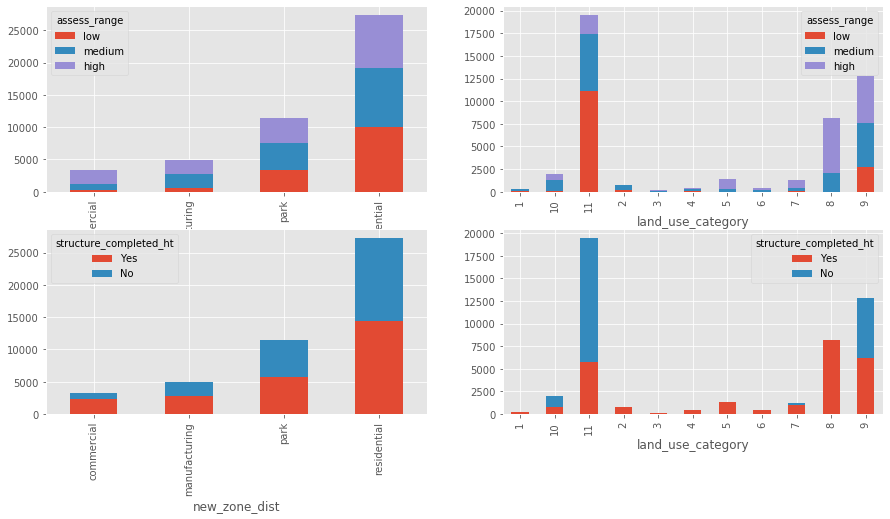

In [193]:
#before that we need to convert this column into categories which are string
nyc_compare_class['structure_completed_ht']=nyc_compare_class['structure_completed_ht'].astype('category')

fig, ax = plt.subplots(2,2,figsize=(WIDTH, HEIGHT/2))

plt.suptitle('')
ch1=nyc1_grouped['assess_range'].count().unstack('assess_range')
ch1[['low','medium','high']].plot(kind='bar',stacked=True , ax=ax[0][0])

nyc1_grouped2=nyc_compare_class.groupby(['land_use_category', 'assess_range'])
ch2=nyc1_grouped2['assess_range'].count().unstack('assess_range')
ch2[['low','medium','high']].plot(kind='bar',stacked=True , ax=ax[0][1])




ch1_grouped=nyc_compare_class.groupby(['new_zone_dist', 'structure_completed_ht'])
ch1=ch1_grouped['structure_completed_ht'].count().unstack('structure_completed_ht')
ch1[['Yes','No']].plot(kind='bar',stacked=True , ax=ax[1][0])

ch2_grouped=nyc_compare_class.groupby(['land_use_category', 'structure_completed_ht'])
ch2=ch2_grouped['structure_completed_ht'].count().unstack('structure_completed_ht')
ch2[['Yes','No']].plot(kind='bar',stacked=True , ax=ax[1][1])


plt.show()

The first thing can be seen from the above plots is that, the zone distriction plots (left plots) are more intereperatable and has a nice distribution between three different assess value ranges, which are low, medium and high and also a nice distribution between whether the structure is complete or not. The left top plot shows that that there is almost a uniform distribution between low, medium and high assess land in all zones, however for the commerical and manufacturing there the assess land value is more towards medium and high rather than low, which kind of makes sense in terms of real state. The left bottom plot also shows that theer is a uniform distribution between if the structure has been completed or no. Unfortunately, the right plots which is the assess value and structure completed based on different land use category, do not give us useful information as the other plots do. To look more in detail let's not break the assess land to ranges and just look at some box plots. 

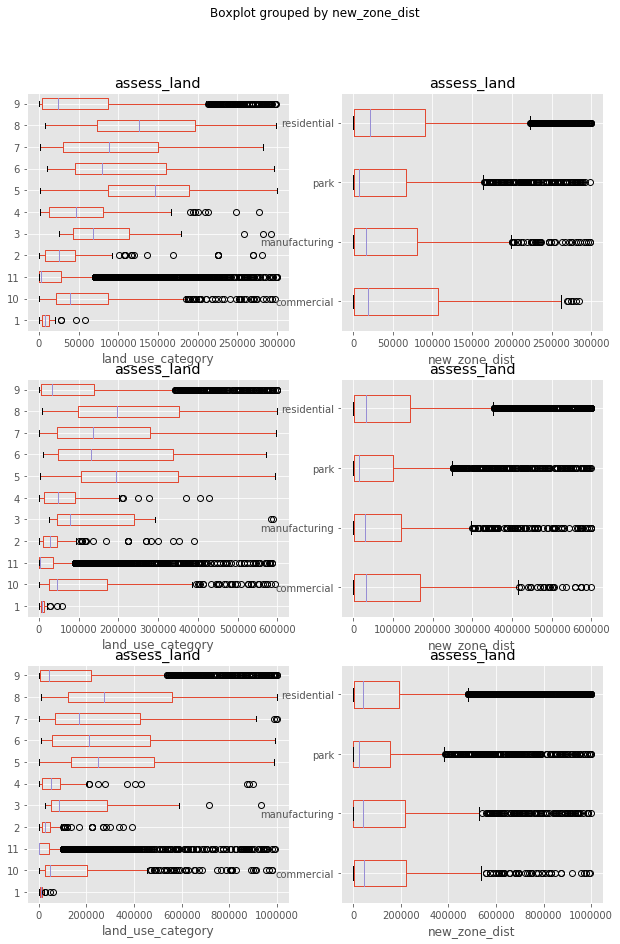

In [52]:
WIDTH=10
HEIGHT=15
fig, ax = plt.subplots(3,2, figsize=(WIDTH, HEIGHT))
plt.suptitle('')


nyc_compare_class.loc[nyc_compare_class.assess_land < 300000].boxplot(
    column=['assess_land'],
    by='land_use_category',
    ax=ax[0][0],
    vert=False
)
yticks(
    (1, 2, 3, 4 ,5,6,7,8,9,10,11),
    ('One & Two Family Buildings', 'Multi-Family Walk-Up Buildings' ,'Multi-Family Elevator Buildings','Mixed Residential & Commercial Buildings',
     'Commercial & Office Buildings','Industrial & Manufacturing','Transportation & Utility','Public Facilities & Institutions',
     'Open Space & Outdoor Recreation',
     'Parking Facilities','Vacant Land')
)    

nyc_compare_class.loc[nyc_compare_class.assess_land < 300000].boxplot(
    column=['assess_land'],
    by='new_zone_dist',
    ax=ax[0][1],
    vert=False
)
yticks(
    (1, 2, 3, 4),
    ('commercial',
     'manufacturing',
     'park',
     'residential',
     )
)

nyc_compare_class.loc[nyc_compare_class.assess_land < 600000].boxplot(
    column=['assess_land'],
    by='land_use_category',
    ax=ax[1][0],
    vert=False
)
yticks(
    (1, 2, 3, 4 ,5,6,7,8,9,10,11),
    ('One & Two Family Buildings', 'Multi-Family Walk-Up Buildings' ,'Multi-Family Elevator Buildings','Mixed Residential & Commercial Buildings',
     'Commercial & Office Buildings','Industrial & Manufacturing','Transportation & Utility','Public Facilities & Institutions',
     'Open Space & Outdoor Recreation',
     'Parking Facilities','Vacant Land')
)   

nyc_compare_class.loc[nyc_compare_class.assess_land < 600000].boxplot(
    column=['assess_land'],
    by='new_zone_dist',
    ax=ax[1][1],
    vert=False
)
yticks(
    (1, 2, 3, 4),
    ('commercial',
     'manufacturing',
     'park',
     'residential',
     )
)
nyc_compare_class.loc[nyc_compare_class.assess_land < 1000000].boxplot(
    column=['assess_land'],
    by='land_use_category',
    ax=ax[2][0],
    vert=False
)

yticks(
    (1, 2, 3, 4 ,5,6,7,8,9,10,11),
    ('One & Two Family Buildings', 'Multi-Family Walk-Up Buildings' ,'Multi-Family Elevator Buildings','Mixed Residential & Commercial Buildings',
     'Commercial & Office Buildings','Industrial & Manufacturing','Transportation & Utility','Public Facilities & Institutions',
     'Open Space & Outdoor Recreation',
     'Parking Facilities','Vacant Land')
)  


nyc_compare_class.loc[nyc_compare_class.assess_land < 1000000].boxplot(
    column=['assess_land'],
    by='new_zone_dist',
    ax=ax[2][1],
    vert=False
)
yticks(
    (1, 2, 3, 4),
    ('commercial',
     'manufacturing',
     'park',
     'residential',
     )
)

plt.show()

From the above left plot, we can see more detail of zone districtions and assess land value. It can be seen that the assess land value of parks and residentials districtions have lower range. The commerical district has the biggest range of assess land value with no outliers and much bigger median, while the high values of assess land for three other districtions are more of an outliers. As a result, we can conclude that there is an important relation between assess land value and zone districtions. Again the right plot, dies not give us as goog as information as the other one does. We would like to see the same plots with different number of floors and total aera.

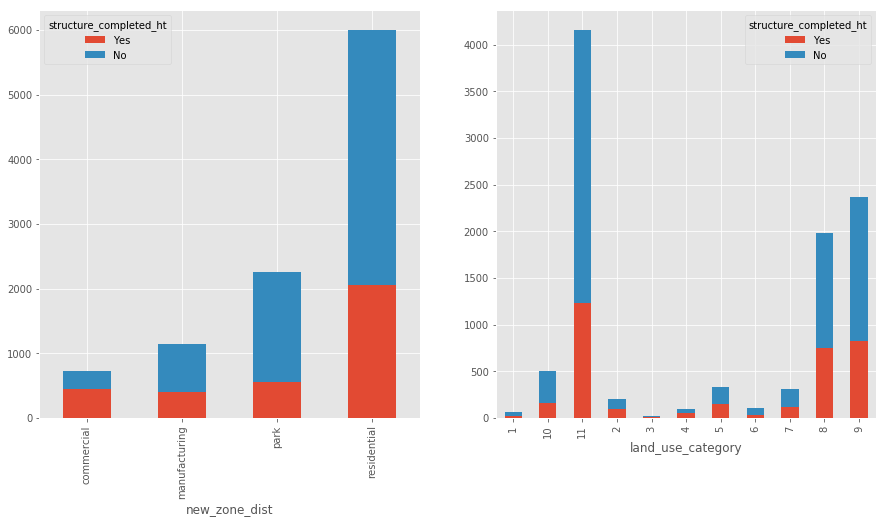

In [34]:
#before that we need to convert this column into category, now they are 0,1 which are integer
nyc_compare_class['structure_completed_ht']=nyc_compare_class['structure_completed_ht'].astype('category')

fig, ax = plt.subplots(1,2,figsize=(WIDTH, HEIGHT/2))
plt.suptitle('')

ch1_grouped=nyc_compare_class.groupby(['new_zone_dist', 'structure_completed_ht'])
ch1=ch1_grouped['structure_completed_ht'].count().unstack('structure_completed_ht')
ch1[['Yes','No']].plot(kind='bar',stacked=True , ax=ax[0])

ch2_grouped=nyc_compare_class.groupby(['land_use_category', 'structure_completed_ht'])
ch2=ch2_grouped['structure_completed_ht'].count().unstack('structure_completed_ht')
ch2[['Yes','No']].plot(kind='bar',stacked=True , ax=ax[1])


plt.show()

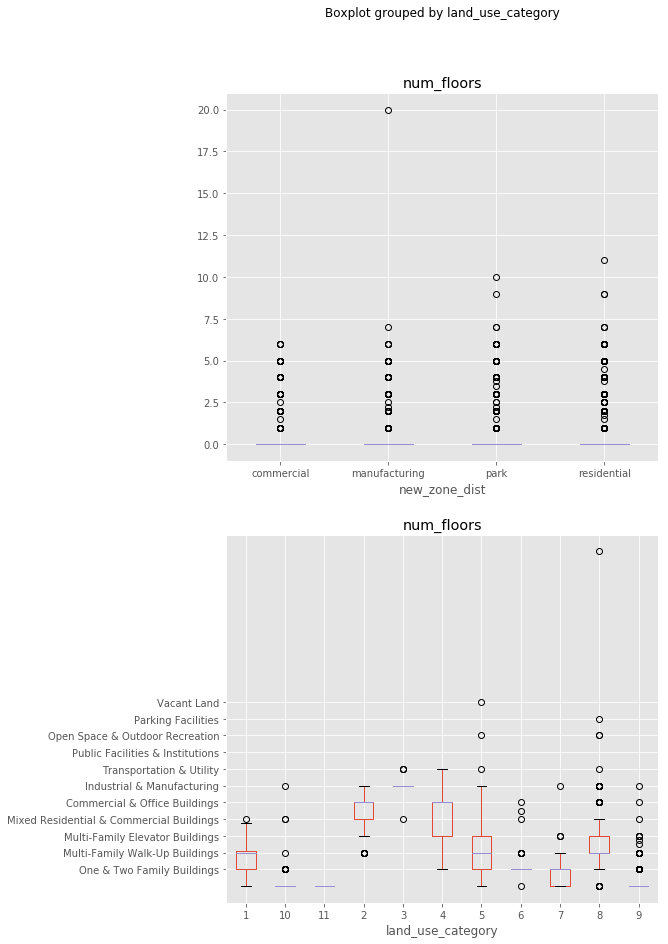

In [43]:
fig, ax = plt.subplots(2,1, figsize=(WIDTH/2, HEIGHT))
plt.suptitle('')

nyc_compare_class.loc[nyc_compare_class.assess_land < 300000].boxplot(
    column=['num_floors'],
    by='new_zone_dist',
    ax=ax[0],
    vert=True
)
yticks(
    (1, 2, 3, 4),
    ('commercial',
     'manufacturing',
     'park',
     'residential',
     )
)
nyc_compare_class.loc[nyc_compare_class.assess_land < 300000].boxplot(
    column=['num_floors'],
    by='land_use_category',
    ax=ax[1],
    vert=True
)
yticks(
    (1, 2, 3, 4 ,5,6,7,8,9,10,11),
        ('One & Two Family Buildings', 'Multi-Family Walk-Up Buildings' ,'Multi-Family Elevator Buildings','Mixed Residential & Commercial Buildings',
     'Commercial & Office Buildings','Industrial & Manufacturing','Transportation & Utility','Public Facilities & Institutions',
     'Open Space & Outdoor Recreation',
     'Parking Facilities','Vacant Land')
)    


plt.show()

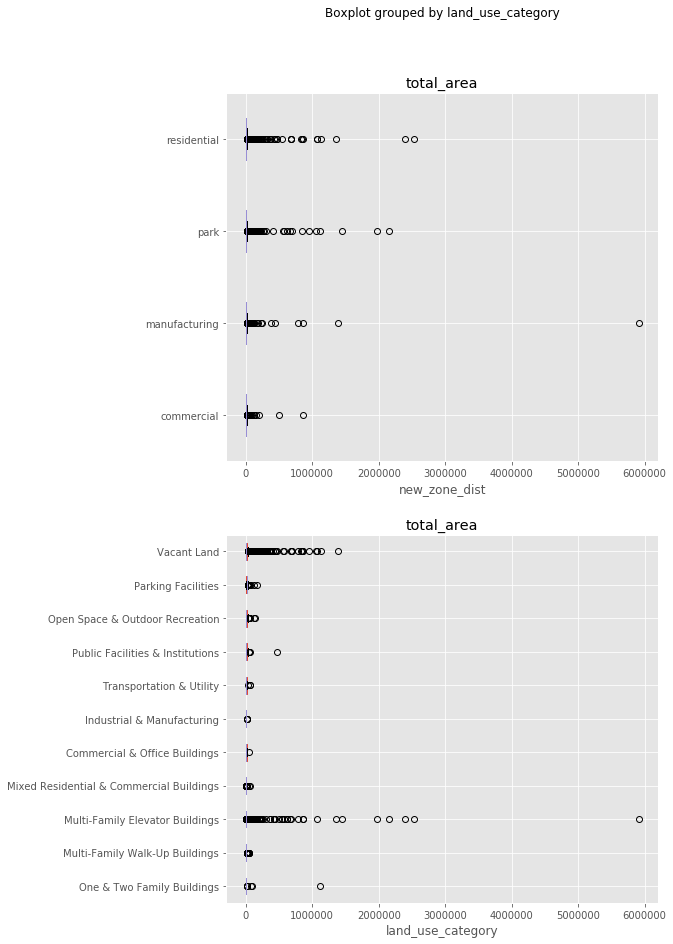

In [44]:
fig, ax = plt.subplots(2,1, figsize=(WIDTH/2, HEIGHT))
plt.suptitle('')

nyc_compare_class.loc[nyc_compare_class.assess_land < 300000].boxplot(
    column=['total_area'],
    by='new_zone_dist',
    ax=ax[0],
    vert=False
)
yticks(
    (1, 2, 3, 4),
    ('commercial',
     'manufacturing',
     'park',
     'residential',
     )
)
nyc_compare_class.loc[nyc_compare_class.assess_land < 300000].boxplot(
    column=['total_area'],
    by='land_use_category',
    ax=ax[1],
    vert=False
)
yticks(
    (1, 2, 3, 4 ,5,6,7,8,9,10,11),
       ('One & Two Family Buildings', 'Multi-Family Walk-Up Buildings' ,'Multi-Family Elevator Buildings','Mixed Residential & Commercial Buildings',
     'Commercial & Office Buildings','Industrial & Manufacturing','Transportation & Utility','Public Facilities & Institutions',
     'Open Space & Outdoor Recreation',
     'Parking Facilities','Vacant Land')
)    


plt.show()

Neither of the four above plots will give us useful information. However, so far we have concluded that the zone distriction is a better target to predict rather than land use category which we did in the previous work. It is also nice if we look at the pair plots of these variables. (We can do these pair plots with more than features if we want, that could be a nice work to be included in the data prepration section)

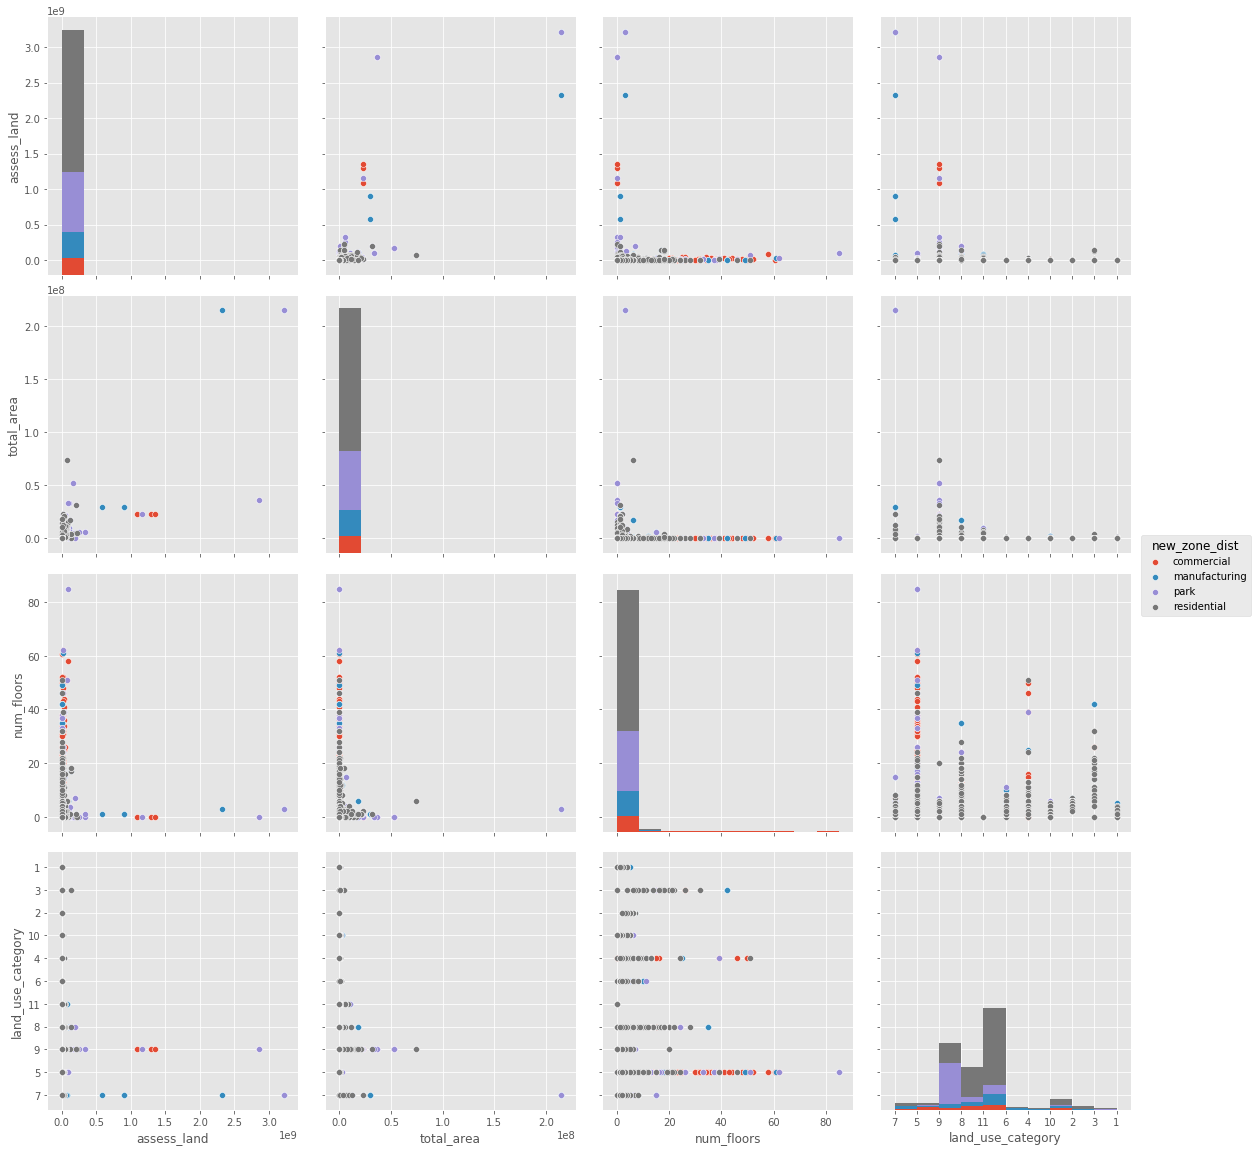

In [197]:
# we use seaborn package to do the pair plots 

sns.pairplot(nyc_compare_class, hue = 'new_zone_dist' , size = 4)


### As a conlusion, for classification task, let's use "zone districts" as target instead of "land use category" which we used in mini lab. We also need to include "structure completed", "assess land", "land use category", "num of floor" and "total aera" as the input features along with the other important fatures that we have found.